In [3]:
import pandas as pd

In [4]:
cols = {'MMSI': int, 'BaseDateTime': object, 'LAT': float, 'LON': float, 'SOG': 
        float, 'COG': float, 'VesselName': object, 'VesselType': float, 
        'Status': float, 'Length': float, 'Width': float, 'Draft': float, 
        'Cargo': float, 'TransceiverClass': object}

In [5]:
df = pd.read_csv('AIS_2022_12_31.csv', dtype=cols)

In [6]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,538008852,2022-12-31T00:00:00,29.86518,-89.91413,12.5,242.0,255.0,KALINKA,IMO9367683,V7A2832,89.0,0.0,182.0,32.0,11.3,80.0,A
1,368086520,2022-12-31T00:00:00,29.41907,-89.33871,0.0,283.0,511.0,MASTER DYLAN,IMO0000000,WDK7657,56.0,NaN,0.0,0.0,NaN,NaN,B
2,368113360,2022-12-31T00:00:01,34.02455,-90.94616,5.8,96.3,511.0,LEE W,IMO1297828,WDL2576,57.0,12.0,224.0,17.0,2.8,57.0,A
3,316033829,2022-12-31T00:00:00,49.29923,-123.02684,0.6,11.6,511.0,ADVENTURE BOUND,IMO0000000,NaN,37.0,NaN,13.0,4.0,NaN,NaN,B
4,538006227,2022-12-31T00:00:01,22.62485,-96.69877,16.4,81.7,80.0,GLOVIS COSMOS,IMO9707027,V7KV9,70.0,0.0,199.0,32.0,10.0,70.0,A


How many rows do we have?

In [7]:
len(df)

751298

In [8]:
new = df[:10000].copy()

In [9]:
new.dtypes

MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading             float64
VesselName           object
IMO                  object
CallSign             object
VesselType          float64
Status              float64
Length              float64
Width               float64
Draft               float64
Cargo               float64
TransceiverClass     object
dtype: object

In [10]:
# This line is only needed if you do not use 'cols'

new['LON'] = new['LON'].astype('float')

In [11]:
new.to_csv('mini_AIS_2022_12_31.csv')

How many unique points in time (seconds) are there?

In [12]:
len(df['BaseDateTime'].unique())

11634

How about unique and NaN values for MMSI, VesselName, IMO, and CallSign?

In [13]:
cols = ['MMSI', 'VesselName', 'IMO', 'CallSign']

for col in cols:
  print(f'Unique {col}s:', len(df[col].unique()))
  print(f'Blank {col}s:', df[col].isna().sum(), '\n')
print('Done!')

Unique MMSIs: 13024
Blank MMSIs: 0 

Unique VesselNames: 11631
Blank VesselNames: 3034 

Unique IMOs: 4051
Blank IMOs: 358848 

Unique CallSigns: 10315
Blank CallSigns: 98316 

Done!


Hold on, there is something else we need to check.

In [14]:
len(df[df['IMO'] == 'IMO0000000'])

118815

In [15]:
df['MMSI'].mode()

0    368061020
Name: MMSI, dtype: int64

In [16]:
df[df['MMSI'] == 367476050]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
881,367476050,2022-12-31T00:00:01,46.09432,-122.92185,0.0,250.8,110.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
5388,367476050,2022-12-31T00:01:03,46.09435,-122.92188,0.1,308.7,92.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
14672,367476050,2022-12-31T00:02:12,46.09439,-122.92198,0.1,281.0,70.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
18846,367476050,2022-12-31T00:03:14,46.09439,-122.92202,0.1,106.3,67.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
27966,367476050,2022-12-31T00:06:23,46.09432,-122.92184,0.1,318.1,115.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723785,367476050,2022-12-31T02:00:00,46.09436,-122.92185,0.1,92.7,272.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
731820,367476050,2022-12-31T03:07:35,46.09439,-122.92220,3.0,267.7,241.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
736508,367476050,2022-12-31T03:06:32,46.09436,-122.92180,0.0,301.5,274.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A
745368,367476050,2022-12-31T01:51:22,46.09422,-122.92166,0.0,151.8,119.0,CLACKAMAS,NaN,WDF6614,31.0,0.0,20.0,6.0,NaN,33.0,A


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
clackamas = df[['LAT', 'LON']]

<Axes: xlabel='LAT', ylabel='LON'>

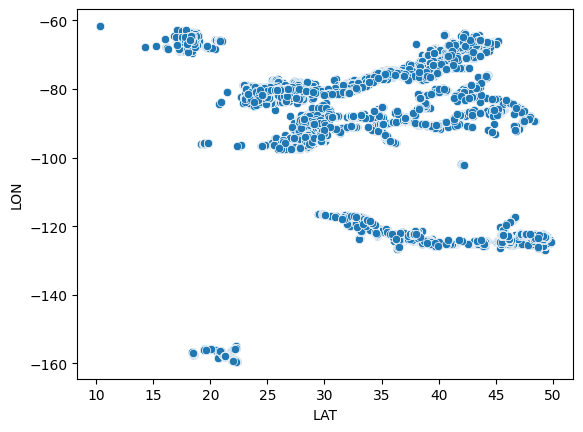

In [21]:
sns.scatterplot(x='LAT', y='LON', data=clackamas)